# Visualize Dose Response Curves

In `2.fit-dose.R`, I fit Hill equations (4 parameter logistic model) to every compound-cell health model dose curve.

Here, I summarize the results with a series of visualizations.

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
source(file.path("repurposing_cellhealth_shiny", "dose_utils.R"))

In [2]:
figure_dir <- file.path("figures", "dose_response")

dose_curve_theme <- theme(
    axis.text.x = element_text(size = 4),
    axis.text.y = element_text(size = 5),
    axis.title = element_text(size = 7)
)

## Load Data

In [3]:
moa_file <- file.path(
    "repurposing_cellhealth_shiny", "data", "moa_cell_health_modz.tsv.gz"
)

moa_cols <- readr::cols(
  .default = readr::col_double(),
  Metadata_Plate_Map_Name = readr::col_character(),
  Metadata_broad_core_id = readr::col_character(),
  Metadata_broad_sample = readr::col_character(),
  Metadata_pert_well = readr::col_character(),
  Metadata_dose_recode = readr::col_character(),
  Metadata_mmoles_per_liter = readr::col_double(),
  broad_id = readr::col_character(),
  pert_iname = readr::col_character(),
  InChIKey14 = readr::col_character(),
  moa = readr::col_character(),
  target = readr::col_character(),
  broad_date = readr::col_character(),
  clinical_phase = readr::col_character(),
  alternative_moa = readr::col_character(),
  alternative_target = readr::col_character()
)

moa_df <- readr::read_tsv(moa_file, col_types = moa_cols)
moa_long_df <- moa_df %>% reshape2::melt(id.vars = c(
  "Metadata_Plate_Map_Name",
  "Metadata_pert_well",
  "Metadata_broad_core_id",
  "InChIKey14",
  "Metadata_broad_sample",
  "Metadata_dose_recode",
  "Metadata_mmoles_per_liter",
  "umap_x",
  "umap_y",
  "broad_id",
  "broad_date",
  "clinical_phase",
  "pert_iname",
  "moa",
  "target",
  "alternative_moa",
  "alternative_target"),
  variable.name = "model",
  value.name = "model_score"
)

print(dim(moa_long_df))
head(moa_long_df, 3)

[1] 725760     19


,Metadata_Plate_Map_Name,Metadata_pert_well,Metadata_broad_core_id,InChIKey14,Metadata_broad_sample,Metadata_dose_recode,Metadata_mmoles_per_liter,umap_x,umap_y,broad_id,broad_date,clinical_phase,pert_iname,moa,target,alternative_moa,alternative_target,model,model_score
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>
1,C-7161-01-LM6-001,B13,BRD-A25234499,ROBVIMPUHSLWNV,BRD-A25234499-001-18-3,6,10.0000,-1.580029,-0.9219316,BRD-A25234499,broad_id_20170327,Launched,aminoglutethimide,glucocorticoid receptor antagonist,CYP11A1|CYP19A1,NA,NA,cell_health_modz_target_cc_late_mitosis_n_spots_h2ax_per_nucleus_area_mean,0.1218401
2,C-7161-01-LM6-001,B14,BRD-A25234499,ROBVIMPUHSLWNV,BRD-A25234499-001-18-3,5,3.3333,-1.904766,-2.4360995,BRD-A25234499,broad_id_20170327,Launched,aminoglutethimide,glucocorticoid receptor antagonist,CYP11A1|CYP19A1,NA,NA,cell_health_modz_target_cc_late_mitosis_n_spots_h2ax_per_nucleus_area_mean,0.1355173
3,C-7161-01-LM6-001,B15,BRD-A25234499,ROBVIMPUHSLWNV,BRD-A25234499-001-18-3,4,1.1111,-1.899164,-2.5914881,BRD-A25234499,broad_id_20170327,Launched,aminoglutethimide,glucocorticoid receptor antagonist,CYP11A1|CYP19A1,NA,NA,cell_health_modz_target_cc_late_mitosis_n_spots_h2ax_per_nucleus_area_mean,0.1814137


In [4]:
dose_file <- file.path("repurposing_cellhealth_shiny", "data", "dose_response_curve_fit_results.tsv.gz")

dose_cols <- readr::cols(
    .default = readr::col_character(),
    slope = readr::col_double(),
    slope_error = readr::col_double(),
    slope_t = readr::col_double(),
    slope_p = readr::col_double(),
    ic_fifty = readr::col_double(),
    ic_fifty_error = readr::col_double(),
    ic_fifty_t = readr::col_double(),
    ic_fifty_p = readr::col_double(),
    residual = readr::col_double()
)

dose_df <- readr::read_tsv(dose_file, col_types = dose_cols) %>% tidyr::drop_na()

print(dim(dose_df))
head(dose_df, 3)

[1] 55969    18


compound,model,broad_id,pert_iname,moa,target,slope,slope_error,slope_t,slope_p,ic_fifty,ic_fifty_error,ic_fifty_t,ic_fifty_p,residual,status,slope_transform,ic_fifty_transform
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
BRD-K95412502-003-01-5,cell_health_modz_target_vb_percent_caspase_dead_only,BRD-K95412502,istaroxime,ATPase inhibitor,ATP1A1,-2.180901,0.02886410,-75.55756,0.0001751177,1.594315065,0.010332336,154.303449,0.0000419973,1.136712e-06,fit,0.22053795071531507,3.0195112853725896
BRD-K33127281-001-05-6,cell_health_modz_target_cc_g1_plus_g2_count,BRD-K33127281,adapalene,retinoid receptor agonist,RARA|RARB|RARG|RXRA|RXRB|RXRG,-1.628146,0.03876839,-41.99674,0.0005664998,1.900681733,0.039390899,48.251799,0.0004292332,4.480693e-06,fit,0.3235036582883984,3.733895969343537
BRD-K31928526-001-02-1,cell_health_modz_target_vb_num_live_cells,BRD-K31928526,barasertib,Aurora kinase inhibitor,AURKA|AURKB,5.050546,0.36301369,13.91282,0.0051264856,0.003011761,0.007644121,0.393997,0.7316227078,4.902957e-06,fit,33.1410154143233,1.0020897742889572


## Generate Summary Figure

In [5]:
residual_gg <- ggplot(dose_df, aes(x = residual)) +
    geom_density(fill="grey") +
    theme_bw() +
    xlab("Residual of Dose Curve Fit") +
    ylab("Density")

summary_gg <- ggplot(dose_df, aes(x = slope_t, y = -log10(slope_p))) +
    geom_point(alpha = 0.5, size = 0.3, pch = 19, color = "black", fill = "black") +
    theme_bw() +
    xlab("Slope Fit Statistic") +
    ylab("-log10 Slope p Value")

ic_fifty_p_density_gg <- ggplot(dose_df, aes(x = -log10(ic_fifty_p))) +
    geom_density(fill = "grey") +
    theme_bw() +
    coord_flip() +
    xlab("") +
    ylab("Density")

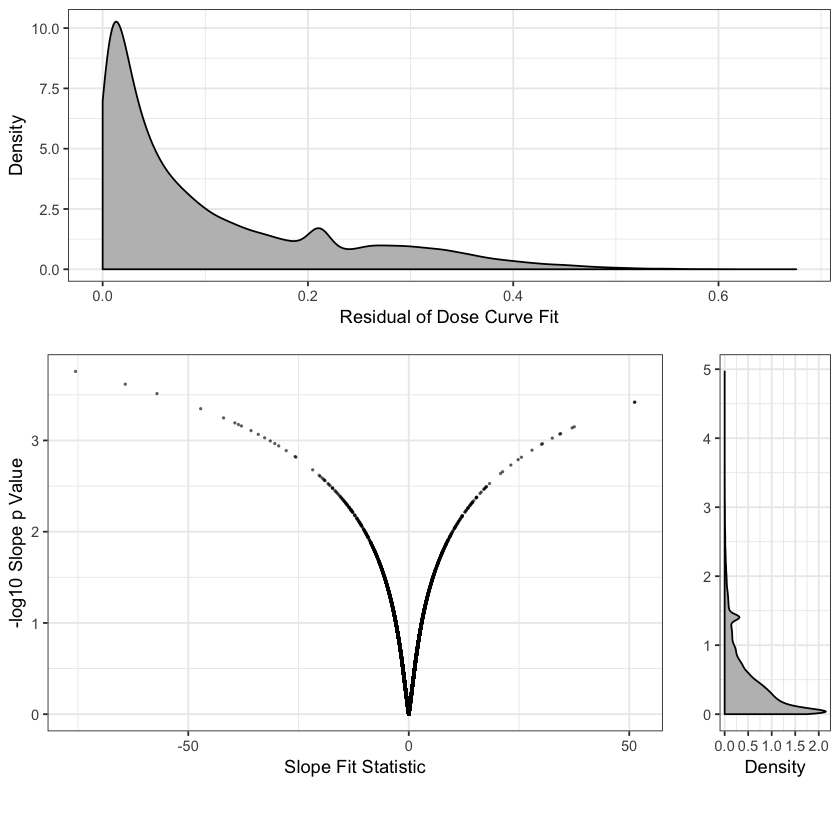

In [6]:
output_file <- file.path(figure_dir, "dose_summary.png")

dose_summary_gg <- cowplot::plot_grid(
    residual_gg,
    cowplot::plot_grid(
        summary_gg,
        ic_fifty_p_density_gg,
        ncol = 2,
        nrow = 1,
        align = "h",
        rel_widths = c(0.8, 0.2)
    ),
    nrow = 2,
    align = "h",
    rel_heights = c(0.4, 0.6)
)

cowplot::save_plot(output_file, dose_summary_gg, base_height = 5, base_width = 6.5)

dose_summary_gg

## Plot Several Examples

In [7]:
model <- "cell_health_modz_target_vb_ros_mean"
pert_name <- "bortezomib"
bortezomib_gg <- suppressWarnings(
    get_dose_curve(moa_long_df, dose_df, model, pert_name, "ROS Mean") + dose_curve_theme
)

dose_df %>% dplyr::filter(pert_iname == !!pert_name, model == !!model)

compound,model,broad_id,pert_iname,moa,target,slope,slope_error,slope_t,slope_p,ic_fifty,ic_fifty_error,ic_fifty_t,ic_fifty_p,residual,status,slope_transform,ic_fifty_transform
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
BRD-K88510285-001-11-1,cell_health_modz_target_vb_ros_mean,BRD-K88510285,bortezomib,NFkB pathway inhibitor|proteasome inhibitor,PSMA1|PSMA2|PSMA3|PSMA4|PSMA5|PSMA6|PSMA7|PSMA8|PSMB1|PSMB10|PSMB11|PSMB2|PSMB3|PSMB4|PSMB5|PSMB6|PSMB7|PSMB8|PSMB9|PSMD1|PSMD2|RELA,-0.8525758,0.1899703,-4.4879434,0.0462325,0.5913592,0.3512002,1.683824,0.2342507,0.001335528,fit,0.5537950965592012,1.5066655737557113
BRD-K50691590-001-02-2,cell_health_modz_target_vb_ros_mean,BRD-K50691590,bortezomib,NFkB pathway inhibitor|proteasome inhibitor,PSMA1|PSMA2|PSMA3|PSMA4|PSMA5|PSMA6|PSMA7|PSMA8|PSMB1|PSMB10|PSMB11|PSMB2|PSMB3|PSMB4|PSMB5|PSMB6|PSMB7|PSMB8|PSMB9|PSMD1|PSMD2|RELA,-9.6079583,79.0290196,-0.1215751,0.9143494,-1.6999259,4.2443929,-0.400511,0.7275126,0.231315611,fit,0.0012814933731251264,0.30780191626884745


In [8]:
model <- "cell_health_modz_target_cc_g1_n_objects"
cell_health_model <- "G1 - Number of Objects"
pert_name <- "HMN-214"
hmn214_g1_gg <- suppressWarnings(
    get_dose_curve(moa_long_df, dose_df, model, pert_name, cell_health_model) + dose_curve_theme
)

dose_df %>% dplyr::filter(pert_iname == !!pert_name, model == !!model)

compound,model,broad_id,pert_iname,moa,target,slope,slope_error,slope_t,slope_p,ic_fifty,ic_fifty_error,ic_fifty_t,ic_fifty_p,residual,status,slope_transform,ic_fifty_transform
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
BRD-K70511574-001-06-9,cell_health_modz_target_cc_g1_n_objects,BRD-K70511574,HMN-214,PLK inhibitor,PLK1,1.720652,0.2179129,7.896053,0.01566325,-1.530516,0.0943352,-16.22423,0.00377751,0.0007902705,fit,3.295853109705296,0.3461535858827172


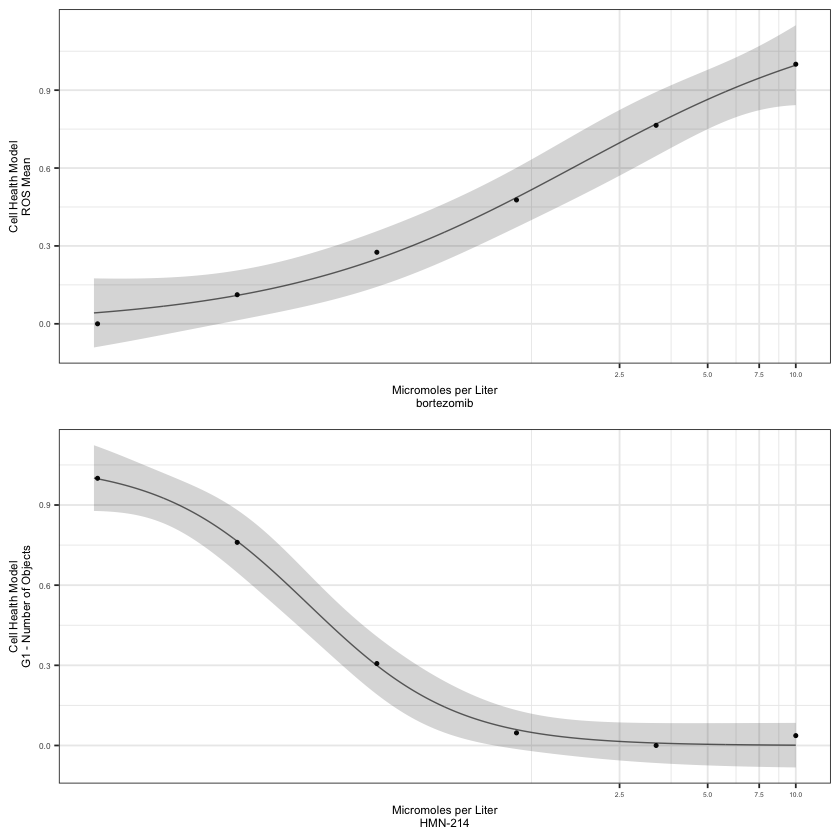

In [9]:
output_file <- file.path(figure_dir, "select_dose_examples.png")

dose_examples_gg <- cowplot::plot_grid(
    bortezomib_gg,
    hmn214_g1_gg,
    nrow = 2,
    ncol = 1,
    align = "v"
)

cowplot::save_plot(output_file, dose_examples_gg, base_height = 3.25, base_width = 3)

dose_examples_gg